In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 3.7MB/s 


In [0]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [0]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_3_Rajat\\Transfer_Learning\\'
dfn = pd.read_csv('Arm_Qsort_Simulated.csv')
df = pd.read_csv( 'Intel_Qsort_Simulated.csv')

In [0]:
df.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime
0,IntelCorei97900X_DDR42666_2GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,2,DDR4,2666,10,1000,442
1,IntelCorei97900X_DDR42666_3GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,3,DDR4,2666,10,1000,442
2,IntelCorei97900X_DDR42666_4GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,4,DDR4,2666,10,1000,442
3,IntelCorei97900X_DDR42666_6GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,6,DDR4,2666,10,1000,442
4,IntelCorei97900X_DDR42666_7GB,3.3,X86_64,8,64,1,32,16,64,1,1024,16,64,10,16,7,DDR4,2666,10,1000,442


In [0]:
dfn.head()

,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime
0,ARM_QcomSnpS4_MSM8227_LPDDR2400_2GB,1.0,ARM,8,64,1,4,8,64,1,16,16,64,2,1,2,LPDDR2,400,2,1000,1247
1,ARM_QcomSnpS4_MSM8227_LPDDR2400_3GB,1.0,ARM,8,64,1,4,8,64,1,16,16,64,2,1,3,LPDDR2,400,2,1000,1247
2,ARM_QcomSnpS4_MSM8227_LPDDR2400_4GB,1.0,ARM,8,64,1,4,8,64,1,16,16,64,2,1,4,LPDDR2,400,2,1000,1247
3,ARM_QcomSnpS4_MSM8227_LPDDR2400_6GB,1.0,ARM,8,64,1,4,8,64,1,16,16,64,2,1,6,LPDDR2,400,2,1000,1247
4,ARM_QcomSnpS4_MSM8227_LPDDR2400_7GB,1.0,ARM,8,64,1,4,8,64,1,16,16,64,2,1,7,LPDDR2,400,2,1000,1247


In [0]:
df.columns, len(df.columns), dfn.columns, len(dfn.columns) # bus-speed is extra in physical

(Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime'],
       dtype='object'),
 21,
 Index(['arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime'],
       dtype='object'),
 21)

In [0]:
len(df),len(dfn)

(1470, 720)

In [0]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [0]:
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

In [0]:
encoded_data_frame.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime
0,IntelCorei97900X_DDR42666_2GB,3.3,1,8,64,1,32,16,64,1,1024,16,64,10,16,2,1,0,0,2666,10,1000,442
1,IntelCorei97900X_DDR42666_3GB,3.3,1,8,64,1,32,16,64,1,1024,16,64,10,16,3,1,0,0,2666,10,1000,442
2,IntelCorei97900X_DDR42666_4GB,3.3,1,8,64,1,32,16,64,1,1024,16,64,10,16,4,1,0,0,2666,10,1000,442
3,IntelCorei97900X_DDR42666_6GB,3.3,1,8,64,1,32,16,64,1,1024,16,64,10,16,6,1,0,0,2666,10,1000,442
4,IntelCorei97900X_DDR42666_7GB,3.3,1,8,64,1,32,16,64,1,1024,16,64,10,16,7,1,0,0,2666,10,1000,442


In [0]:
encoded_data_frame_n.head()

,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime
0,ARM_QcomSnpS4_MSM8227_LPDDR2400_2GB,1.0,1,8,64,1,4,8,64,1,16,16,64,2,1,2,1,0,0,400,2,1000,1247
1,ARM_QcomSnpS4_MSM8227_LPDDR2400_3GB,1.0,1,8,64,1,4,8,64,1,16,16,64,2,1,3,1,0,0,400,2,1000,1247
2,ARM_QcomSnpS4_MSM8227_LPDDR2400_4GB,1.0,1,8,64,1,4,8,64,1,16,16,64,2,1,4,1,0,0,400,2,1000,1247
3,ARM_QcomSnpS4_MSM8227_LPDDR2400_6GB,1.0,1,8,64,1,4,8,64,1,16,16,64,2,1,6,1,0,0,400,2,1000,1247
4,ARM_QcomSnpS4_MSM8227_LPDDR2400_7GB,1.0,1,8,64,1,4,8,64,1,16,16,64,2,1,7,1,0,0,400,2,1000,1247


In [0]:
encoded_data_frame.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime'],
      dtype='object')

In [0]:
encoded_data_frame_n.columns

Index(['arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime'],
      dtype='object')

In [0]:
total_data_n = encoded_data_frame_n.drop(columns = ['arch'])

In [0]:
total_data = encoded_data_frame.drop(columns = ['arch'])

In [0]:
total_data.columns, total_data_n.columns

(Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime'],
       dtype='object'),
 Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
        'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime'],
       dtype='object'))

In [0]:
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

In [0]:
X_Intel = total_data.drop(columns = ['runtime']).to_numpy()
Y_Intel = total_data['runtime'].to_numpy()

In [0]:
X_ARM = total_data_n.drop(columns = ['runtime']).to_numpy()
Y_ARM = total_data_n['runtime'].to_numpy()

In [0]:
X_Intel.shape, X_ARM.shape, Y_Intel.shape, Y_ARM.shape

((1470, 21), (720, 21), (1470,), (720,))

In [0]:
Y_Intel[:10], Y_ARM[:10] 

(array([442, 442, 442, 442, 442, 525, 525, 525, 525, 525]),
 array([1247, 1247, 1247, 1247, 1247, 1067, 1067, 1067, 1067, 1067]))

In [0]:
# Separating ARM data to 1% and 99%
X_train_ARM, X_test_ARM, Y_train_ARM, Y_test_ARM = train_test_split(X_ARM, Y_ARM, test_size = 0.99, random_state=42)
print(X_train_ARM.shape, X_test_ARM.shape, Y_train_ARM.shape, Y_test_ARM.shape)
X_train_Intel = np.append(X_Intel, X_train_ARM,axis = 0)
Y_train_Intel = np.append(Y_Intel, Y_train_ARM,axis = 0)
print(X_train_Intel.shape, Y_train_Intel.shape, X_test_ARM.shape, Y_test_ARM.shape)

(7, 21) (713, 21) (7,) (713,)
(1477, 21) (1477,) (713, 21) (713,)


In [0]:
scaler_x = StandardScaler()
X_Intel = scaler_x.fit_transform(X_Intel)
X_train_ARM = scaler_x.fit_transform(X_train_ARM)
X_test_ARM = scaler_x.fit_transform(X_test_ARM)
scaler_y = StandardScaler()
Y_Intel = np.reshape(Y_Intel, (len(Y_Intel),1))
Y_test_ARM = np.reshape(Y_test_ARM, (len(Y_test_ARM),1))
Y_train_ARM = np.reshape(Y_train_ARM, (len(Y_train_ARM),1))
Y_Intel = scaler_y.fit_transform(Y_Intel)
Y_test_ARM = scaler_y.fit_transform(Y_test_ARM)
Y_train_ARM = scaler_y.fit_transform(Y_train_ARM)
print(X_Intel.shape, Y_Intel.shape, X_train_ARM.shape, Y_train_ARM.shape, X_test_ARM.shape, Y_test_ARM.shape)

(1470, 21) (1470, 1) (7, 21) (7, 1) (713, 21) (713, 1)


In [0]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,793
Trainable params: 9,793
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


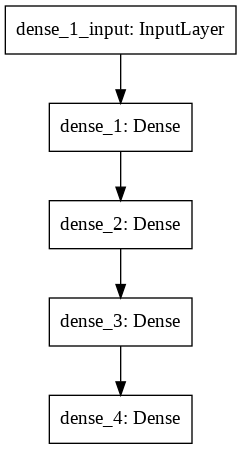

In [0]:
dnn_2 = Sequential()
dnn_2.add(Dense(64, input_dim = 21, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(64, activation='relu'))
# dnn_2.add(Dropout(0.4))
dnn_2.add(Dense(1, activation='linear'))
print('Model : DNN 2', dnn_2.summary())
plot_model(dnn_2)

In [0]:
dnn_2.compile(loss='mae', optimizer='adam', metrics=['mae'])
dnn_2.fit(X_Intel, Y_Intel, epochs = 100, batch_size = 10, verbose = 2)





Epoch 1/100





 - 9s - loss: 0.2265 - mean_absolute_error: 0.2265
Epoch 2/100
 - 0s - loss: 0.0904 - mean_absolute_error: 0.0904
Epoch 3/100
 - 0s - loss: 0.0655 - mean_absolute_error: 0.0655
Epoch 4/100
 - 0s - loss: 0.0536 - mean_absolute_error: 0.0536
Epoch 5/100
 - 0s - loss: 0.0519 - mean_absolute_error: 0.0519
Epoch 6/100
 - 0s - loss: 0.0502 - mean_absolute_error: 0.0502
Epoch 7/100
 - 0s - loss: 0.0423 - mean_absolute_error: 0.0423
Epoch 8/100
 - 0s - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 9/100
 - 0s - loss: 0.0380 - mean_absolute_error: 0.0380
Epoch 10/100
 - 0s - loss: 0.0367 - mean_absolute_error: 0.0367
Epoch 11/100
 - 0s - loss: 0.0358 - mean_absolute_error: 0.0358
Epoch 12/100
 - 0s - loss: 0.0344 - mean_absolute_error: 0.0344
Epoch 13/100
 - 0s - loss: 0.0335 - mean_absolute_error: 0.0335
Epoch 14/100
 - 0s - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 15/100
 - 0s - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 16/100
 - 0s - loss: 0.0376 - mean

In [0]:
# Freeze the layers except the last 2 dense layers
for layer in dnn_2.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in dnn_2.layers:
    print(layer, layer.trainable)

<keras.layers.core.Dense object at 0x7f4531afcf60> False
<keras.layers.core.Dense object at 0x7f4531af90f0> False
<keras.layers.core.Dense object at 0x7f4531af9c18> True
<keras.layers.core.Dense object at 0x7f4531b1bf60> True


In [0]:
dnn_2.fit(X_train_ARM, Y_train_ARM, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.1882 - mean_absolute_error: 0.1882
Epoch 2/100
 - 0s - loss: 0.1327 - mean_absolute_error: 0.1327
Epoch 3/100
 - 0s - loss: 0.0947 - mean_absolute_error: 0.0947
Epoch 4/100
 - 0s - loss: 0.0945 - mean_absolute_error: 0.0945
Epoch 5/100
 - 0s - loss: 0.0407 - mean_absolute_error: 0.0407
Epoch 6/100
 - 0s - loss: 0.0936 - mean_absolute_error: 0.0936
Epoch 7/100
 - 0s - loss: 0.0901 - mean_absolute_error: 0.0901
Epoch 8/100
 - 0s - loss: 0.0977 - mean_absolute_error: 0.0977
Epoch 9/100
 - 0s - loss: 0.0541 - mean_absolute_error: 0.0541


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 10/100
 - 0s - loss: 0.0860 - mean_absolute_error: 0.0860
Epoch 11/100
 - 0s - loss: 0.0665 - mean_absolute_error: 0.0665
Epoch 12/100
 - 0s - loss: 0.0700 - mean_absolute_error: 0.0700
Epoch 13/100
 - 0s - loss: 0.0649 - mean_absolute_error: 0.0649
Epoch 14/100
 - 0s - loss: 0.0403 - mean_absolute_error: 0.0403
Epoch 15/100
 - 0s - loss: 0.0676 - mean_absolute_error: 0.0676
Epoch 16/100
 - 0s - loss: 0.0701 - mean_absolute_error: 0.0701
Epoch 17/100
 - 0s - loss: 0.0585 - mean_absolute_error: 0.0585
Epoch 18/100
 - 0s - loss: 0.0388 - mean_absolute_error: 0.0388
Epoch 19/100
 - 0s - loss: 0.0793 - mean_absolute_error: 0.0793
Epoch 20/100
 - 0s - loss: 0.0539 - mean_absolute_error: 0.0539
Epoch 21/100
 - 0s - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 22/100
 - 0s - loss: 0.1040 - mean_absolute_error: 0.1040
Epoch 23/100
 - 0s - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 24/100
 - 0s - loss: 0.0326 - mean_absolute_error: 0.0326
Epoch 25/100
 - 0s - loss: 0.0363 - mean

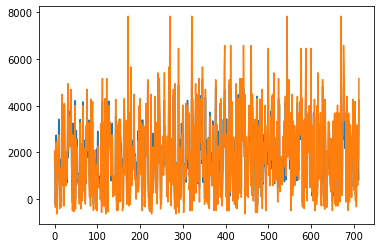

In [0]:
Y_pred = dnn_2.predict(X_test_ARM)
Y_pred = scaler_y.inverse_transform(Y_pred)
Y_fold = scaler_y.inverse_transform(Y_test_ARM)
plt.plot(Y_pred)
plt.plot(Y_fold)

MSE: 
 2.42322624895725e+18

R2: 
 0.9152520898784735

MAPE: 
 22.472688714227395


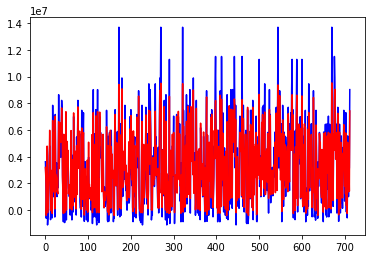

In [0]:
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
Y_fold = scaler_y.inverse_transform(Y_fold)
Y_pred = scaler_y.inverse_transform(Y_pred)
r2_scores = (r2_score(Y_fold, Y_pred))
mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_scores[0])